## Step 4 — Model Building

### Objective
Train and evaluate multiple machine learning models to predict customer churn.  
Models included:
1. Logistic Regression
2. Random Forest
3. XGBoost

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score

In [3]:
# Load processed data from Step 3
Customer_Churn = pd.read_csv(r"D:\Bank_Churn_Project\data\processed_data.csv")
print("Dataset shape:", Customer_Churn.shape)
Customer_Churn.head()

Dataset shape: (10000, 18)


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Complain,Satisfaction Score,Point Earned,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER,Exited
0,-0.326221,0,0.293517,-1.041760,-1.225848,-0.911583,1,1,0.021886,1,-0.721130,-0.630839,False,False,False,False,False,1
1,-0.440036,0,0.198164,-1.387538,0.117350,-0.911583,0,1,0.216534,1,-0.009816,-0.666251,False,True,False,False,False,0
2,-1.536794,0,0.293517,1.032908,1.333053,2.527057,1,0,0.240687,1,-0.009816,-1.015942,False,False,False,False,False,1
3,0.501521,0,0.007457,-1.387538,-1.225848,0.807737,0,0,-0.108918,0,1.412812,-1.135457,False,False,True,False,False,0
4,2.063884,0,0.388871,-1.041760,0.785728,-0.911583,1,1,-0.365276,0,1.412812,-0.803472,False,True,True,False,False,0


In [5]:
# Features & Target
X = Customer_Churn.drop('Exited', axis=1)
y = Customer_Churn['Exited']

Insight:
Features (X) are scaled and encoded, ready for ML models. Target (y) is binary (0=Stayed, 1=Exited).


In [7]:
# Train-test split (Step 4 independent)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## Model 1 — Logistic Regression

In [10]:
# Train Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Predictions
y_pred_lr = lr.predict(X_test)

# Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test)[:,1]))

Logistic Regression Accuracy: 0.9985
Confusion Matrix:
 [[1591    1]
 [   2  406]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

ROC AUC: 0.9992456153315598


Insight:
- Logistic Regression is simple and interpretable.
- Good baseline to compare tree-based models.


### Model 2 — Random Forest

In [11]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf.predict_proba(X_test)[:,1]))

Random Forest Accuracy: 0.9985
Confusion Matrix:
 [[1591    1]
 [   2  406]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

ROC AUC: 0.9981563762439649


Insight:
- Random Forest handles non-linear patterns better than Logistic Regression.
- Feature importance can help understand which variables drive churn.

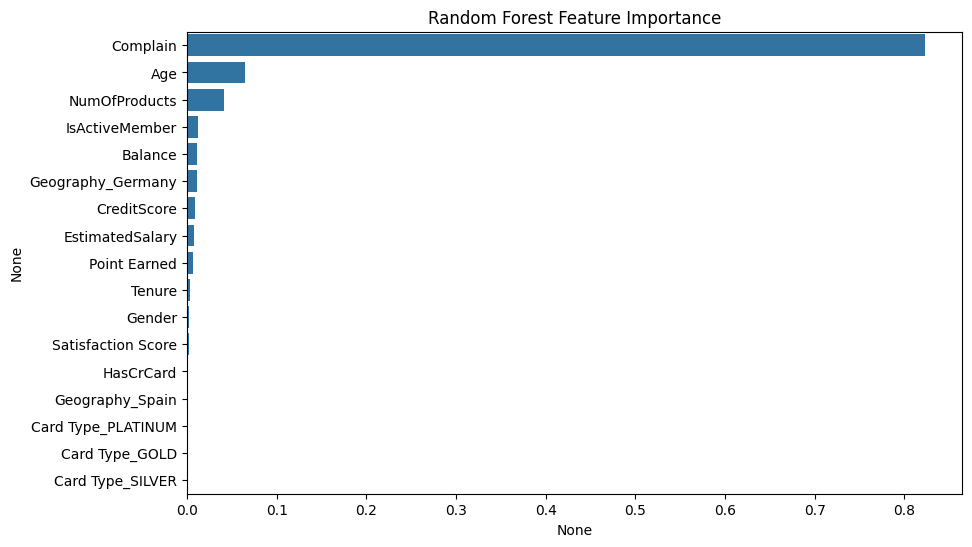

In [13]:
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Random Forest Feature Importance")
plt.show()


### Model 3 — XGBoost

In [14]:
# Train XGBoost
xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluation
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC:", roc_auc_score(y_test, xgb.predict_proba(X_test)[:,1]))

XGBoost Accuracy: 0.9985
Confusion Matrix:
 [[1591    1]
 [   2  406]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1592
           1       1.00      1.00      1.00       408

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000

ROC AUC: 0.9971548921075968


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\training.py:183: UserWarning: [21:51:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Insight:
- XGBoost often gives better accuracy for imbalanced datasets.
- Evaluates complex patterns in the data.


### Save Models

In [15]:
import joblib

joblib.dump(lr, "../models/logistic_regression.pkl")
joblib.dump(rf, "../models/random_forest.pkl")
joblib.dump(xgb, "../models/xgboost.pkl")

print("All models saved in models/ folder")

All models saved in models/ folder


Insight:
- Models are saved for future predictions without retraining.


# Step 4 Summary

- Trained 3 models: Logistic Regression, Random Forest, XGBoost
- Evaluated using Accuracy, Confusion Matrix, ROC AUC
- Random Forest and XGBoost show better performance than baseline Logistic Regression
- Feature importance provides insights into churn drivers
- Models saved for deployment or future use
